In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df_iii = pd.read_csv('data/df_iii.csv')
ws = pd.read_csv('data/white_stripes_df.csv')
dw = pd.read_csv('data/dead_weather_df.csv')
tr = pd.read_csv('data/raconteurs_df.csv')
jw = pd.read_csv('data/jack_white_df.csv')

In [3]:
df_iii.drop(['Unnamed: 0'], axis=1, inplace=True)
ws.drop(['Unnamed: 0', 'Artist'], axis=1, inplace=True)
dw.drop(['Unnamed: 0', 'Artist'], axis=1, inplace=True)
tr.drop(['Unnamed: 0', 'Artist'], axis=1, inplace=True)
jw.drop(['Unnamed: 0', 'Artist'], axis=1, inplace=True)

In [4]:
df_iii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             205 non-null    object 
 1   Album             205 non-null    object 
 2   Artist            205 non-null    object 
 3   Popularity        205 non-null    int64  
 4   Date              205 non-null    int64  
 5   danceability      205 non-null    float64
 6   energy            205 non-null    float64
 7   key               205 non-null    int64  
 8   loudness          205 non-null    float64
 9   mode              205 non-null    int64  
 10  speechiness       205 non-null    float64
 11  acousticness      205 non-null    float64
 12  instrumentalness  205 non-null    float64
 13  liveness          205 non-null    float64
 14  valence           205 non-null    float64
 15  tempo             205 non-null    float64
 16  duration_ms       205 non-null    int64  
 1

In [6]:
ws['Date'] = pd.to_datetime(ws['Date'])
ws['Date'] = ws['Date'].dt.year

dw['Date'] = pd.to_datetime(dw['Date'])
dw['Date'] = dw['Date'].dt.year

tr['Date'] = pd.to_datetime(tr['Date'])
tr['Date'] = tr['Date'].dt.year

jw['Date'] = pd.to_datetime(jw['Date'])
jw['Date'] = jw['Date'].dt.year

In [9]:
print("Artists:", df_iii['Artist'].unique())
print("The White Stripes:", ws['Album'].unique())
print("The Dead Weather:", dw['Album'].unique())
print("The Raconteurs:", tr['Album'].unique())
print("Jack White:", jw['Album'].unique())

Artists: ['The White Stripes' 'The Dead Weather' 'The Raconteurs' 'Jack White']
The White Stripes: ['Icky Thump' 'Get Behind Me Satan' 'Elephant' 'White Blood Cells'
 'De Stijl' 'The White Stripes']
The Dead Weather: ['Sea of Cowards' 'Dodge And Burn' 'Horehound']
The Raconteurs: ['Broken Boy Soldiers' 'Consolers of the Lonely' 'Help Us Stranger']
Jack White: ['Fear Of The Dawn' 'Boarding House Reach' 'Lazaretto' 'Blunderbuss']


# Spotify popularity

According to Spotify, “popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.”

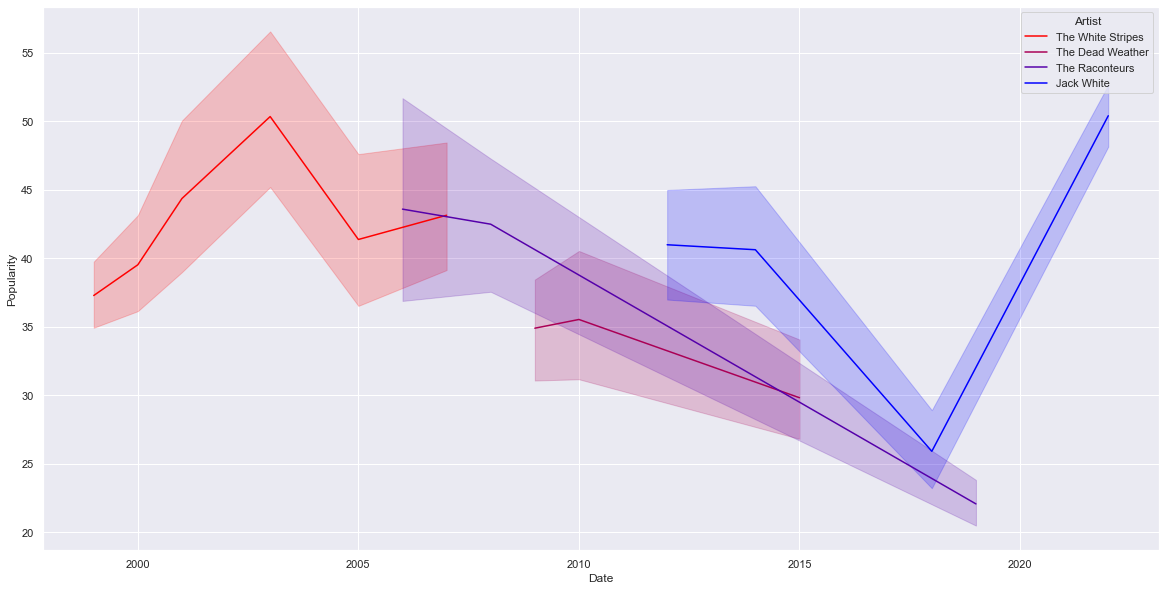

In [41]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.lineplot(data=df_iii, x="Date", y="Popularity", hue="Artist", palette=sns.blend_palette(['red','blue'], 4))

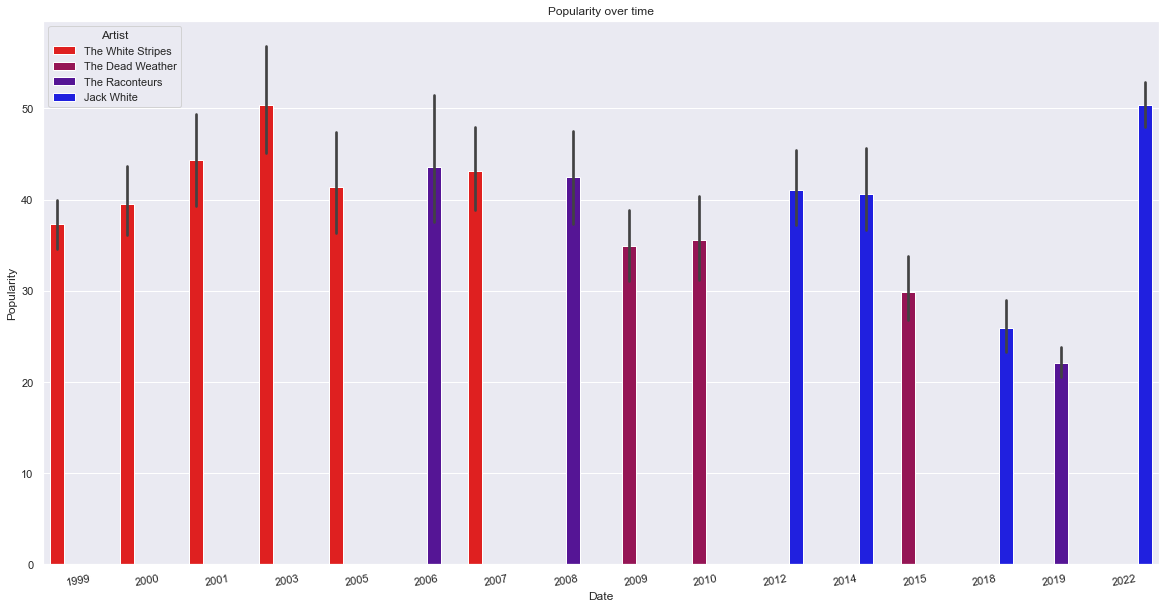

In [42]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="Date", y="Popularity", hue="Artist", data=df_iii, palette=sns.blend_palette(['red','blue'], 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 10)
ax.set(title='Popularity over time');

In [23]:
df_iii['Date'].unique()

array([2007, 2005, 2003, 2001, 2000, 1999, 2010, 2015, 2009, 2006, 2008,
       2019, 2022, 2018, 2014, 2012])

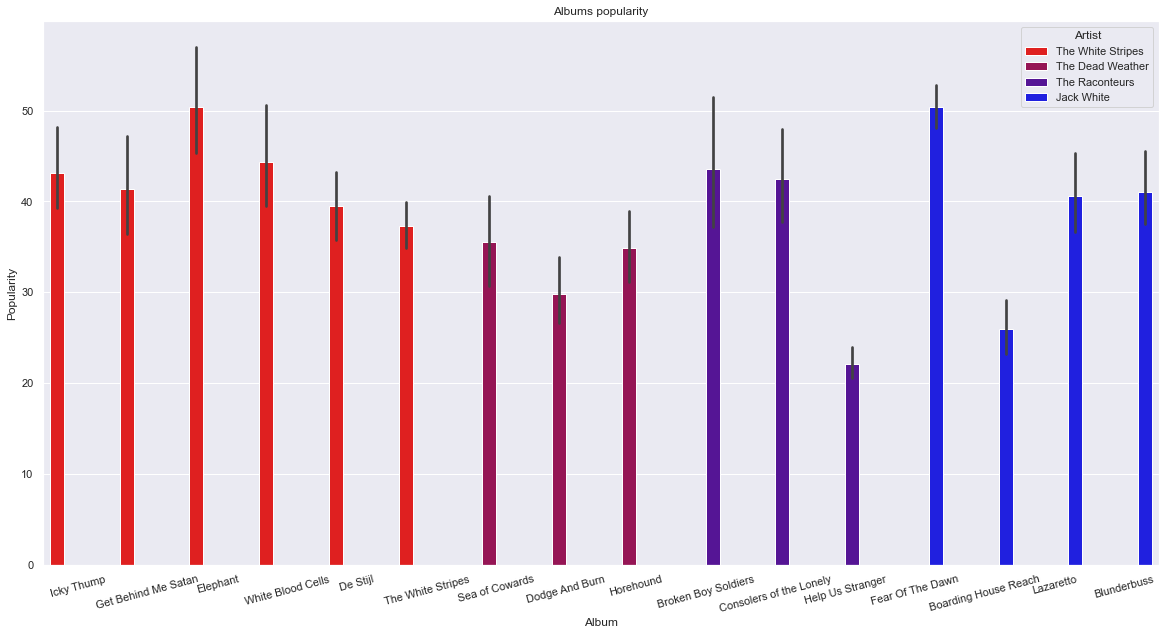

In [77]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="Album", y="Popularity", hue="Artist", data=df_iii, palette=sns.blend_palette(['red','blue'], 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 15)
ax.set(title='Albums popularity');

We want to see if there is a correlation between any audio features deteted by Spotify and the popularity

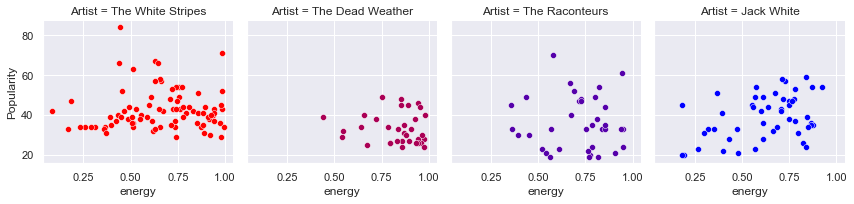

In [45]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "energy", "Popularity");

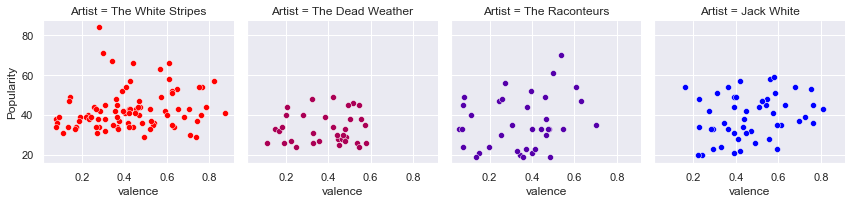

In [46]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "valence", "Popularity");

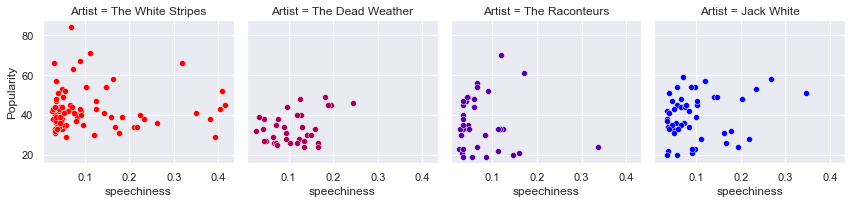

In [47]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "speechiness", "Popularity");

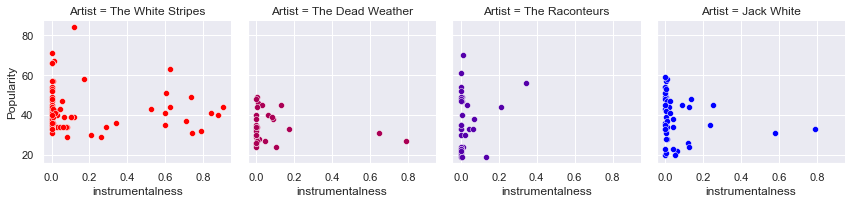

In [48]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "instrumentalness", "Popularity");

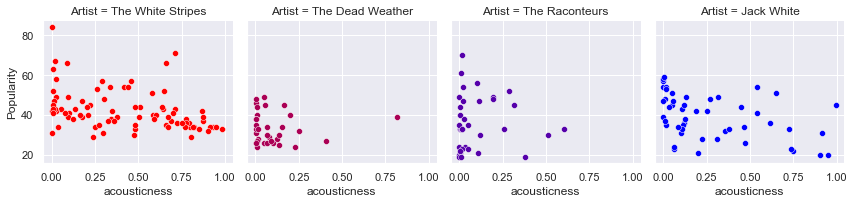

In [49]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "acousticness", "Popularity");

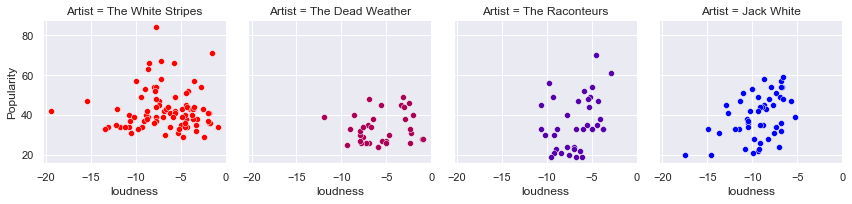

In [51]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "loudness", "Popularity");

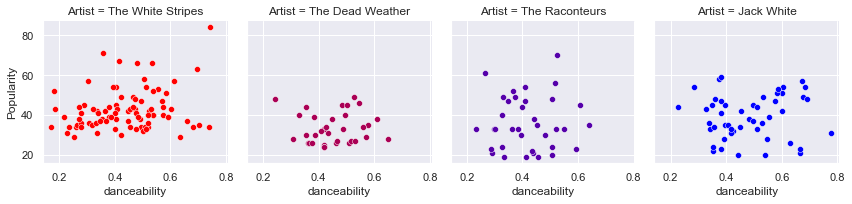

In [53]:
grid = sns.FacetGrid(df_iii, col = "Artist", hue = "Artist", col_wrap=4, palette=sns.blend_palette(['red','blue'], 4))
grid.map(sns.scatterplot, "danceability", "Popularity");

We an do the same for each album of the band

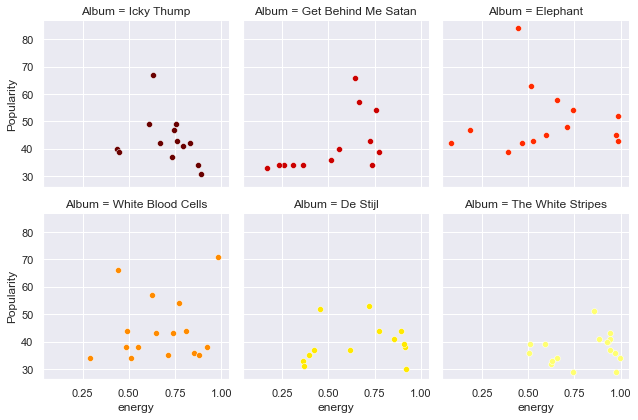

In [126]:
grid = sns.FacetGrid(ws, col = "Album", hue = "Album", col_wrap=3, palette='hot')
grid.map(sns.scatterplot, "energy", "Popularity");

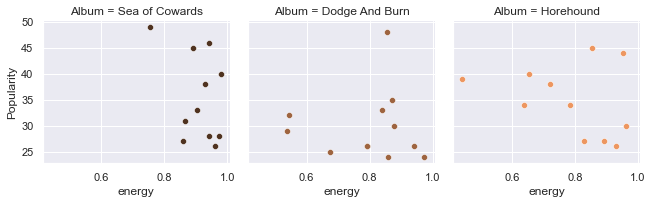

In [136]:
grid = sns.FacetGrid(dw, col = "Album", hue = "Album", col_wrap=4, palette='copper')
grid.map(sns.scatterplot, "energy", "Popularity");

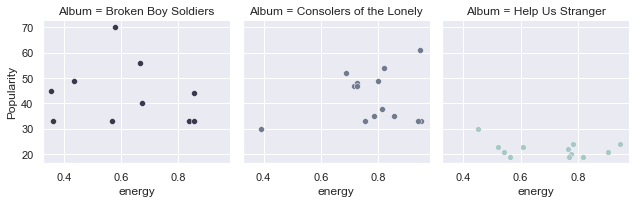

In [135]:
grid = sns.FacetGrid(tr, col = "Album", hue = "Album", col_wrap=3, palette='bone')
grid.map(sns.scatterplot, "energy", "Popularity");

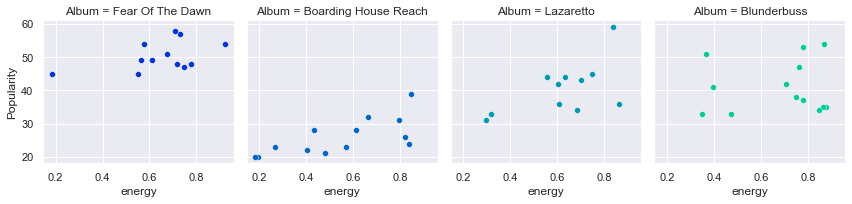

In [134]:
grid = sns.FacetGrid(jw, col = "Album", hue = "Album", col_wrap=4, palette='winter')
grid.map(sns.scatterplot, "energy", "Popularity");

We can also keep consistent the value of popularity and compare simultaneously each feature for all the bands:

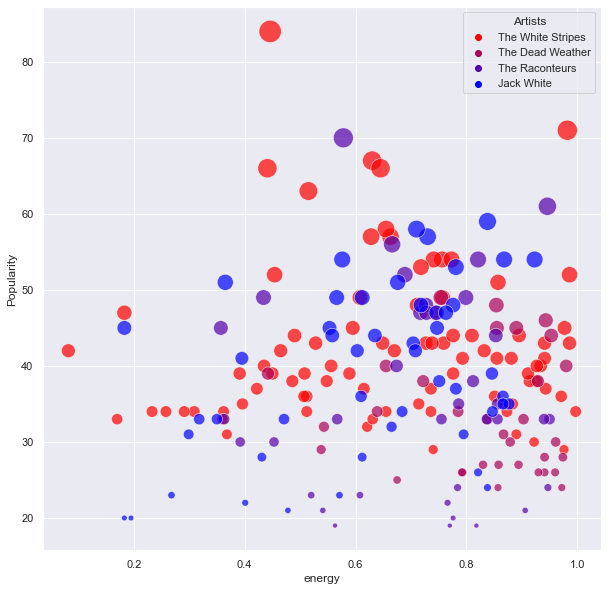

In [139]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='energy', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists")
plt.savefig("data/energy_pop_artists.png");

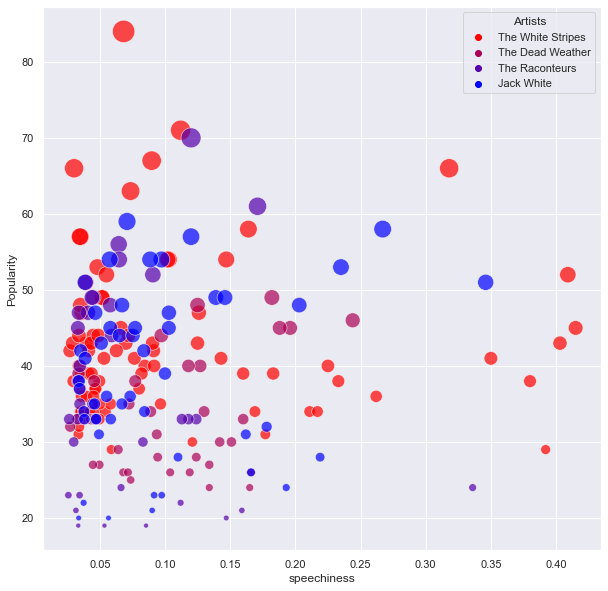

In [141]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='speechiness', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

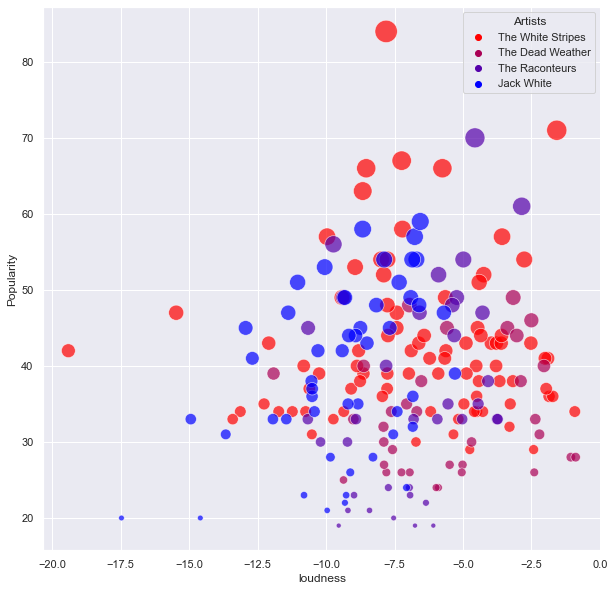

In [143]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='loudness', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

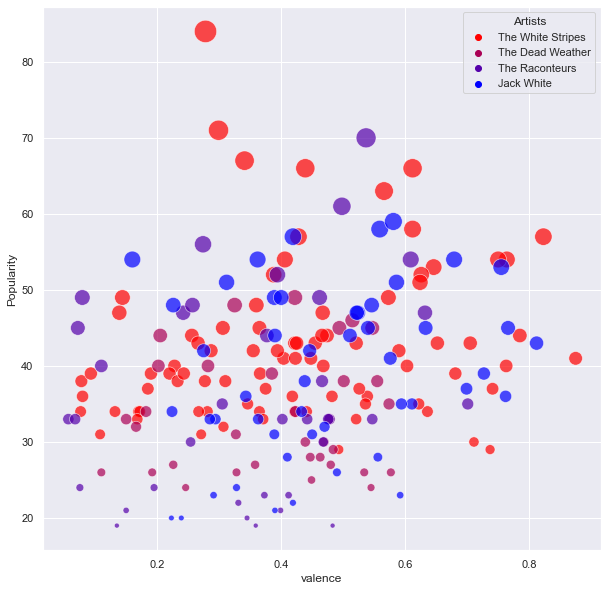

In [144]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='valence', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

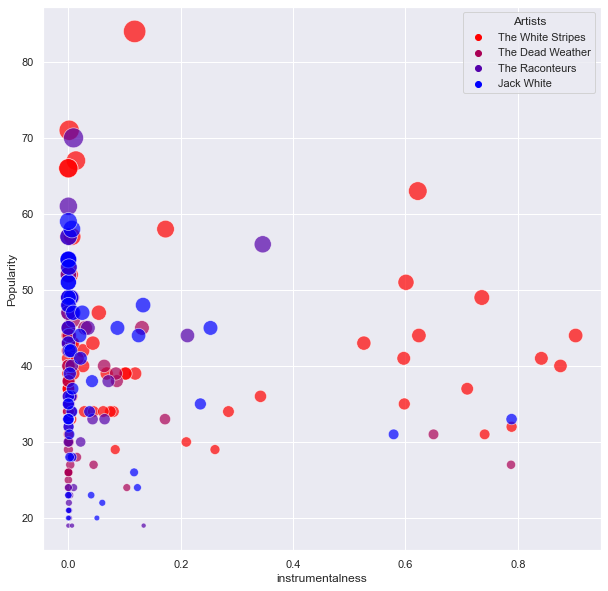

In [145]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='instrumentalness', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

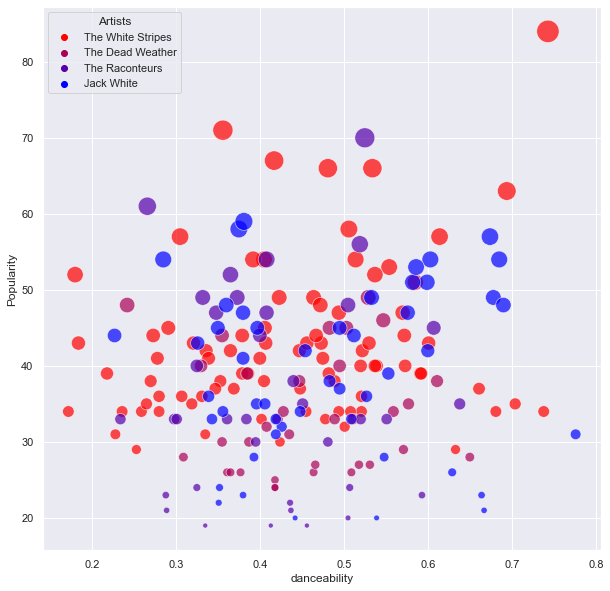

In [146]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='danceability', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

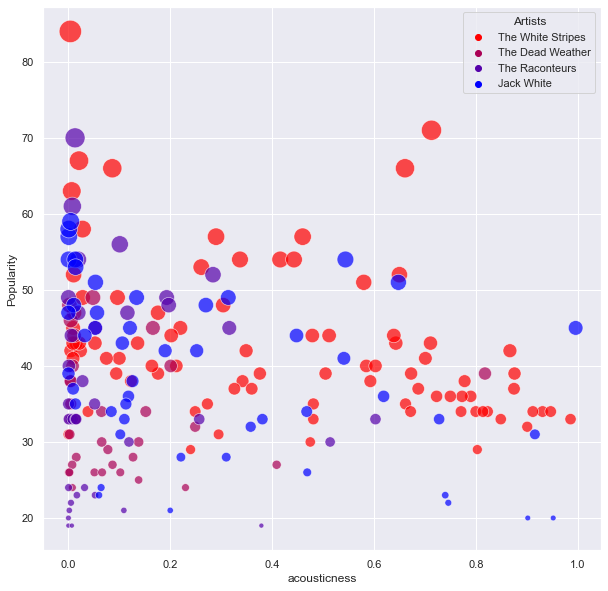

In [142]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=df_iii, x='acousticness', y='Popularity', 
                     hue='Artist', palette=sns.blend_palette(['red','blue'], 4), 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Artists");

Each band independently 

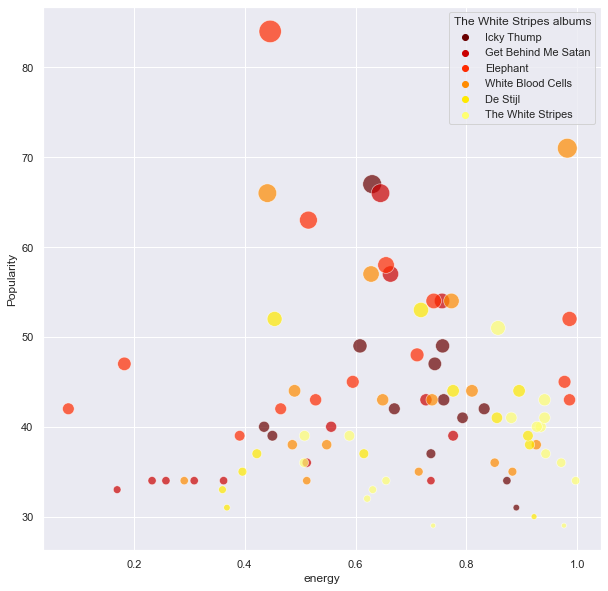

In [138]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=ws, x='energy', y='Popularity', 
                     hue='Album', palette='hot', 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:7], labs[1:7], loc='best', title="The White Stripes albums");

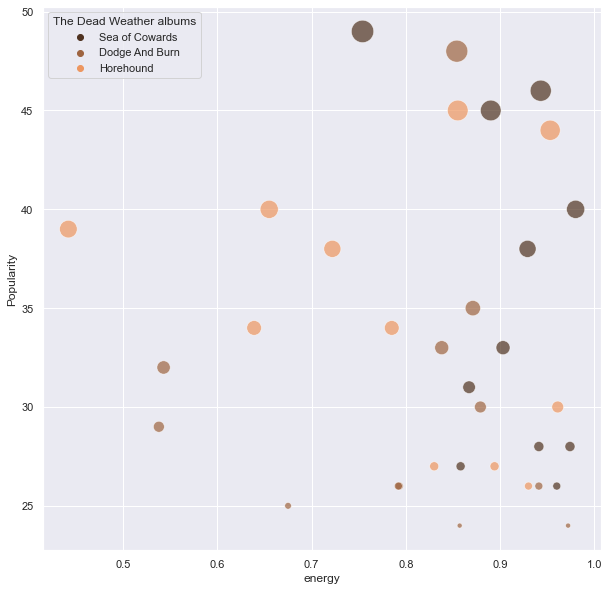

In [114]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=dw, x='energy', y='Popularity', 
                     hue='Album', palette='copper', 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:4], labs[1:4], loc='best', title="The Dead Weather albums");

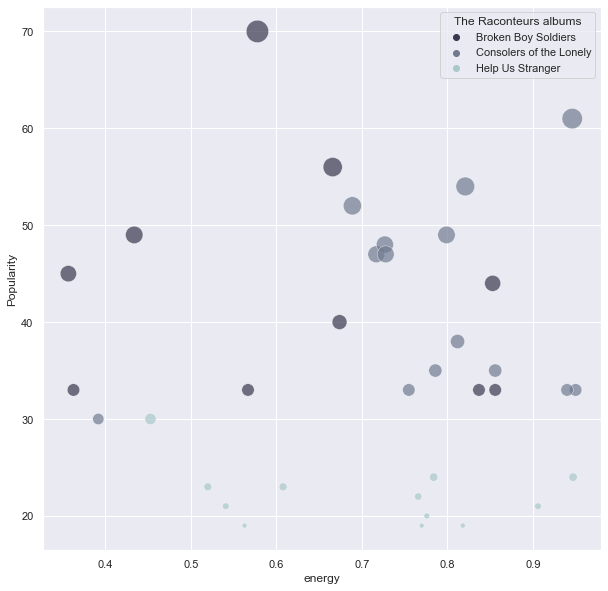

In [113]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=tr, x='energy', y='Popularity', 
                     hue='Album', palette='bone', 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:4], labs[1:4], loc='best', title="The Raconteurs albums");

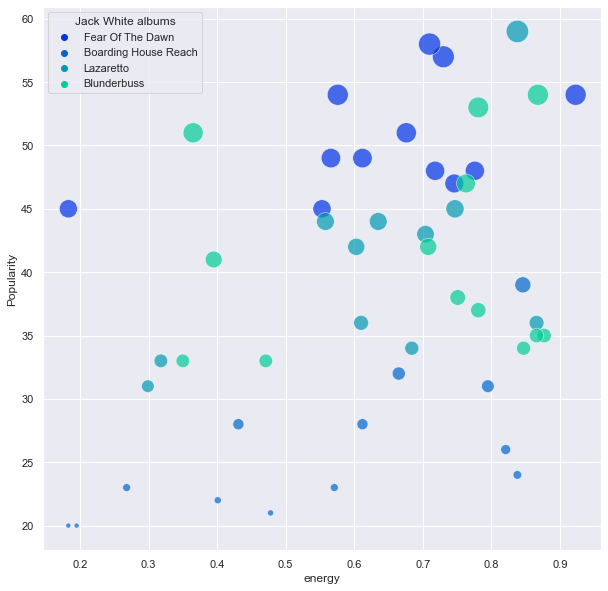

In [112]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=jw, x='energy', y='Popularity', 
                     hue='Album', palette='winter', 
                     size='Popularity', sizes=(25,500), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:5], labs[1:5], loc='best', title="Jack White albums");